In [1]:
from math import log
import matplotlib.pyplot as plt
import re, glob, os
%matplotlib inline

# Baseline (assignment 1.2.1)

### Extracting all baseline files and running times

In [2]:
quick_times = [(1,1)]
heap_times = [(1,1)]
your_times = [(1,1)]
your_OPT_times = [(1,1)]

algorithms = [quick_times,heap_times,your_times,your_OPT_times]
names = ['Quicksort','Heapsort','Yoursort','Yoursort_OPT']

# change directory to search in /data/
os.chdir("/Users/baunbaun/Documents/computersystemer_BAUN/compsys/A3/src/data")

# extract baseline data
for file in glob.glob("*baseline*"):
    f = open(file,"r");
    # The regular expression below was inspired by the webpage: 
    # https://www.tutorialspoint.com/How-to-extract-numbers-from-a-string-in-Python
    numbers = [int(s) for s in re.findall(r'\d+\d*', f.read())]
    n = [int(s) for s in re.findall(r'\d+\d*', file)][0]
    
    #print(f)
    
    # running time is the last number in numbers
    time = numbers[len(numbers)-1:][0]
    tupl = (n,time) 

    # put baseline data in the correct list
    if(re.search('quick',file)):
        quick_times.append(tupl)
    elif(re.search('heap',file)):
        heap_times.append(tupl)
    elif(re.search('yoursort_OPT',file)):
        your_OPT_times.append(tupl)
    elif(re.search('yoursort',file)):
        your_times.append(tupl)
        
    f.close() 

# sort lists by n and print the result
print("Baseline data: \n")
for i in range(len(algorithms)):
    algorithms[i] = sorted(algorithms[i], key=lambda tup: tup[0])
    print(names[i], "baseline:")
    for t in algorithms[i]:
        print(t, "\n")

Baseline data: 

Quicksort baseline:
(1, 1) 

(10, 1227) 

(100, 16146) 

(1000, 193237) 

(10000, 2325099) 

Heapsort baseline:
(1, 1) 

(10, 1242) 

(100, 20862) 

(1000, 296831) 

(10000, 3937219) 

Yoursort baseline:
(1, 1) 

(10, 1215) 

(100, 15846) 

(1000, 191038) 

(10000, 2304995) 

Yoursort_OPT baseline:
(1, 1) 

(10, 1137) 

(100, 15640) 

(1000, 192228) 

(10000, 2358263) 



### Plot baseline (running time in cycles per n-elements)

Quicksort [(1, 1), (10, 1227), (100, 16146), (1000, 193237), (10000, 2325099)]
Heapsort [(1, 1), (10, 1242), (100, 20862), (1000, 296831), (10000, 3937219)]
Yoursort [(1, 1), (10, 1215), (100, 15846), (1000, 191038), (10000, 2304995)]
Yoursort_OPT [(1, 1), (10, 1137), (100, 15640), (1000, 192228), (10000, 2358263)]


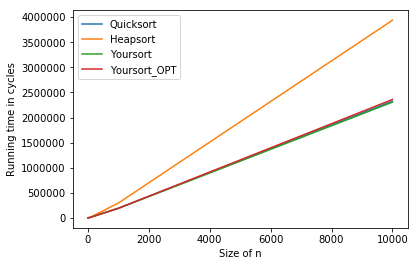

In [3]:
for i in range(len(algorithms)):
    algo = algorithms[i]
    name = names[i]
    print(name, algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    plt.xlabel('Size of n')
    plt.ylabel('Running time in cycles')
    #plt.xscale('log')
    #plt.xlim([1,1e8])
    #plt.ylim([1,1e8])

### Plot baseline (running time in cycles per one element)
#### OBS, script may only be run once or the tuples are divided again and again

Quicksort [(1, 1.0), (10, 122.7), (100, 161.46), (1000, 193.237), (10000, 232.5099)]
Heapsort [(1, 1.0), (10, 124.2), (100, 208.62), (1000, 296.831), (10000, 393.7219)]
Yoursort [(1, 1.0), (10, 121.5), (100, 158.46), (1000, 191.038), (10000, 230.4995)]
Yoursort_OPT [(1, 1.0), (10, 113.7), (100, 156.4), (1000, 192.228), (10000, 235.8263)]


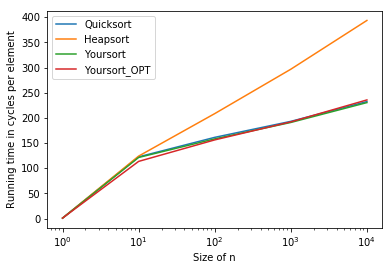

In [4]:
# helper function
def div(algo):
    algo_copy = algo
    for i in range(len(algo)):
        tup = algo[i]
        algo_copy[i] = int(tup[0]),(tup[1]/tup[0])
    return algo_copy 

for i in range(len(algorithms)):
    algo = div(algorithms[i])
    name = names[i]
    print(name, algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    #plt.xlim([1,1e8])
    #plt.ylim([1,20])
    plt.xlabel('Size of n')
    plt.ylabel('Running time in cycles per element')
    plt.xscale('log')


# Delay (assignment 1.2.2)

In [5]:
# extracting all delay files and running times

# Lists for cache misses
quick_miss_L1 = [(1,1)]
heap_miss_L1 = [(1,1)]
your_miss_L1 = [(1,1)]
your_OPT_miss_L1 = [(1,1)]

quick_miss_L2 = [(1,1)]
heap_miss_L2 = [(1,1)]
your_miss_L2 = [(1,1)]
your_OPT_miss_L2 = [(1,1)]

# Lists for AMAT
quick_AMAT_L1 = [(1,1)]
heap_AMAT_L1 = [(1,1)]
your_AMAT_L1 = [(1,1)]
your_OPT_AMAT_L1 = [(1,1)]

quick_AMAT_L2 = [(1,1)]
heap_AMAT_L2 = [(1,1)]
your_AMAT_L2 = [(1,1)]
your_OPT_AMAT_L2 = [(1,1)]

# Lists with all data from all algorithms
L1_cache_misses_algo = [quick_miss_L1,heap_miss_L1,your_miss_L1,your_OPT_miss_L1]
L2_cache_misses_algo = [quick_miss_L2,heap_miss_L2,your_miss_L2,your_OPT_miss_L2]
L1_AMAT_algo = [quick_AMAT_L1,heap_AMAT_L1,your_AMAT_L1,your_OPT_AMAT_L1]
L2_AMAT_algo = [quick_AMAT_L2,heap_AMAT_L2,your_AMAT_L2,your_OPT_AMAT_L2]

D_cache = 0
I_cache = 0
L1_miss = 0 # L1 is the sum of the D- and I-cache
L2_miss = 0

L1_miss_tupl = (0,0)
L2_miss_tupl = (0,0)

# AMAT = hit time + miss rate * miss penalty

# Hit times
L1_hit_time = 3 
L2_hit_time = 15
main_hit_time = 115

# Miss penalties
L1_miss_pen = L2_hit_time-L1_hit_time 
L2_miss_pen = main_hit_time-L2_hit_time 

# Miss rate variables
L1_miss_rate = 0
L2_miss_rate = 0

# AMAT variables
L1_AMAT = 0
L2_AMAT = 0

L1_AMAT_tupl = (0,0)
L2_AMAT_tupl = (0,0)

# change directory to search in /data/
os.chdir("/Users/baunbaun/Documents/computersystemer_BAUN/compsys/A3/src/data")

# extract 
for file in glob.glob("*memory*"):
    f = open(file,"r");
    # extract only digits
    numbers = [int(s) for s in re.findall(r'\d+\d*', f.read())]  
    n = [int(s) for s in re.findall(r'\d+\d*', file)][0]
            
    D_cache = numbers[21:22]
    I_cache = numbers[16:17]
    
    L1_miss = D_cache[0] + I_cache[0]
    L2_miss = numbers[11:12][0]
    
    L2_reads_writes = numbers[9:10][0]+numbers[10:11][0]
    L1_reads_writes = numbers[14:15][0]+numbers[15:16][0]+numbers[19:20][0]+numbers[20:21][0]
    
    L1_miss_rate = L1_miss/L1_reads_writes
    L2_miss_rate = L2_miss/L2_reads_writes
    
    L1_AMAT = L1_hit_time + (L1_miss_rate*L1_miss_pen)
    L2_AMAT = L2_hit_time + (L2_miss_rate*L2_miss_pen)
    
    # For plotting
    L1_AMAT_tupl = (n,round(L1_AMAT))
    L2_AMAT_tupl = (n,round(L2_AMAT))
    L1_miss_tupl = (n,round(L1_miss)) 
    L2_miss_tupl = (n,round(L2_miss)) 

    if(re.search('quick',file)):
        quick_miss_L1.append(L1_miss_tupl)
        quick_miss_L2.append(L2_miss_tupl)
        quick_AMAT_L1.append(L1_AMAT_tupl)
        quick_AMAT_L2.append(L2_AMAT_tupl)
    elif(re.search('heap',file)):
        heap_miss_L1.append(L1_miss_tupl)
        heap_miss_L2.append(L2_miss_tupl)
        heap_AMAT_L1.append(L1_AMAT_tupl)
        heap_AMAT_L2.append(L2_AMAT_tupl)
    elif(re.search('yoursort_OPT',file)):
        your_OPT_miss_L1.append(L1_miss_tupl)
        your_OPT_miss_L2.append(L2_miss_tupl)
        your_OPT_AMAT_L1.append(L1_AMAT_tupl)
        your_OPT_AMAT_L2.append(L2_AMAT_tupl)
    elif(re.search('yoursort',file)):
        your_miss_L1.append(L1_miss_tupl)
        your_miss_L2.append(L2_miss_tupl)
        your_AMAT_L1.append(L1_AMAT_tupl)
        your_AMAT_L2.append(L2_AMAT_tupl)
        
    f.close() 
    
# sort lists by n

print("L1 delay data: \n")
for i in range(len(L1_cache_misses_algo)):
    L1_cache_misses_algo[i] = sorted(L1_cache_misses_algo[i], key=lambda tup: tup[0])
    print(names[i], ": cache misses:")
    for t in L1_cache_misses_algo[i]:
        print(t, "\n")
print("\nL2 delay data: \n")
for i in range(len(L2_cache_misses_algo)):
    L2_cache_misses_algo[i] = sorted(L2_cache_misses_algo[i], key=lambda tup: tup[0])
    print(names[i], ": cache misses:")
    for t in L2_cache_misses_algo[i]:
        print(t, "\n")
print("\nL1 AMAT data: \n")
for i in range(len(L1_AMAT_algo)):
    L1_AMAT_algo[i] = sorted(L1_AMAT_algo[i], key=lambda tup: tup[0])
    print(names[i], ": L1 AMAT:")
    for t in L1_AMAT_algo[i]:
        print(t, "\n")
print("\nL2 AMAT data: \n")
for i in range(len(L2_AMAT_algo)):
    L2_AMAT_algo[i] = sorted(L2_AMAT_algo[i], key=lambda tup: tup[0])
    print(names[i], ": L2 AMAT:")
    for t in L2_AMAT_algo[i]:
        print(t, "\n")

L1 delay data: 

Quicksort : cache misses:
(1, 1) 

(10, 31) 

(100, 85) 

(1000, 545) 

(10000, 15505) 

Heapsort : cache misses:
(1, 1) 

(10, 32) 

(100, 77) 

(1000, 528) 

(10000, 31342) 

Yoursort : cache misses:
(1, 1) 

(10, 32) 

(100, 86) 

(1000, 546) 

(10000, 15506) 

Yoursort_OPT : cache misses:
(1, 1) 

(10, 29) 

(100, 80) 

(1000, 541) 

(10000, 15372) 


L2 delay data: 

Quicksort : cache misses:
(1, 1) 

(10, 30) 

(100, 84) 

(1000, 543) 

(10000, 5060) 

Heapsort : cache misses:
(1, 1) 

(10, 31) 

(100, 76) 

(1000, 526) 

(10000, 5027) 

Yoursort : cache misses:
(1, 1) 

(10, 31) 

(100, 85) 

(1000, 544) 

(10000, 5061) 

Yoursort_OPT : cache misses:
(1, 1) 

(10, 29) 

(100, 80) 

(1000, 540) 

(10000, 5052) 


L1 AMAT data: 

Quicksort : L1 AMAT:
(1, 1) 

(10, 3) 

(100, 3) 

(1000, 3) 

(10000, 3) 

Heapsort : L1 AMAT:
(1, 1) 

(10, 3) 

(100, 3) 

(1000, 3) 

(10000, 3) 

Yoursort : L1 AMAT:
(1, 1) 

(10, 3) 

(100, 3) 

(1000, 3) 

(10000, 3) 

Yoursort_OPT

### Plot delay in L1 cache

Quicksort [(1, 1), (10, 31), (100, 85), (1000, 545), (10000, 15505)]
Heapsort [(1, 1), (10, 32), (100, 77), (1000, 528), (10000, 31342)]
Yoursort [(1, 1), (10, 32), (100, 86), (1000, 546), (10000, 15506)]
Yoursort_OPT [(1, 1), (10, 29), (100, 80), (1000, 541), (10000, 15372)]


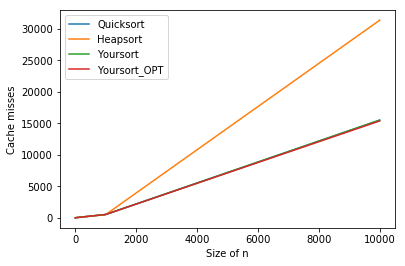

In [6]:
for i in range(len(L1_cache_misses_algo)):
    algo = L1_cache_misses_algo[i]
    name = names[i]
    print(name, algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    #plt.xlim([1,1e8])
    #plt.ylim([1,20])
    plt.xlabel('Size of n')
    plt.ylabel('Cache misses')
    #plt.xscale('log')

### Plot delay in L2 cache

Quicksort [(1, 1), (10, 30), (100, 84), (1000, 543), (10000, 5060)]
Heapsort [(1, 1), (10, 31), (100, 76), (1000, 526), (10000, 5027)]
Yoursort [(1, 1), (10, 31), (100, 85), (1000, 544), (10000, 5061)]
Yoursort_OPT [(1, 1), (10, 29), (100, 80), (1000, 540), (10000, 5052)]


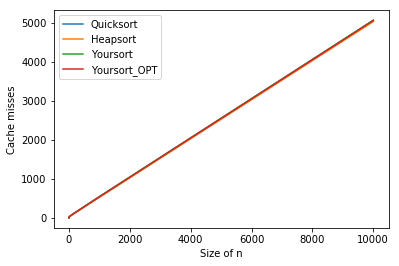

In [7]:
for i in range(len(L2_cache_misses_algo)):
    algo = L2_cache_misses_algo[i]
    name = names[i]
    print(name, algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    #plt.xlim([1,1e8])
    #plt.ylim([1,20])
    plt.xlabel('Size of n')
    plt.ylabel('Cache misses')
    #plt.xscale('log')